# Machine Learning : CARS.CSV
    Dans ce projet, nous allons les prédire les origines des véhicules à partir de leurs
    caractéristiques respectives, en utilisant un arbre de décision.

    Structue du rapport et de l'exposé:
        - I - Présentation du dataset utilisé
        - II - Présentation du programme et des résultats
        - III - Conlusion et perspectives

# I - Présentation du dataset utilisé
    I.1 - Importation
    I.2 - Exploration du dataset
        I.2.a - Objectifs
        I.2.b - Analyse de forme
        I.2.c - Analyse de fond
        I.2.d - Conclusion
    I.3 - Analyse détaillée
        I.3.a - Relation variables / variables
        I.3.b - Hypotheses nulle
        I.3.c - tests de studens ou de Khi2

# I.1 - Importation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cars = pd.read_csv("cars.csv", sep = ";")
cars.head()

mpg  cylinders cubicinches   hp weightlbs  time-to-60  year     brand
0  14.0          8         350  165      4209          12  1972       US.
1  31.9          4          89   71      1925          14  1980   Europe.
2  17.0          8         302  140      3449          11  1971       US.
3  15.0          8         400  150      3761          10  1971       US.
4  30.5          4          98   63      2051          17  1978       US.

In [3]:
cars.tail()

mpg  cylinders cubicinches   hp weightlbs  time-to-60  year    brand
256  17.0          8         305  130      3840          15  1980      US.
257  36.1          4          91   60      1800          16  1979   Japan.
258  22.0          6         232  112      2835          15  1983      US.
259  18.0          6         232  100      3288          16  1972      US.
260  22.0          6         250  105      3353          15  1977      US.

# I.2 - Exploration du dataset

# I.2.a - Objectifs
    - comprendre du mieux possible nos données
    - Mettre les base du developpement de la premiere strategie de modelisation

# I.2.b - Analyse de forme
    - Target : "brand"
    - Features : "mpg", "cylinders", "cubicinches", "hp", "weightlbs", "time-to-60", "year"
    - Shape : (261, 8)
    - dtypes :
        -> Object (Qualitatives : 3)
            <> cubicinches     object
            <> weightlbs       object
            <> brand           object
        -> Numeric (Quantitative : 5)
            <> mpg            float64
            <> cylinders        int64
            <> hp               int64
            <> time-to-60       int64
            <> year             int64
    - NaN : il semble ne pas y avoir des données manquantes ou soit tres peu de données manquante

In [4]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [5]:
cars.shape

(261, 8)

In [6]:
cars.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [7]:
cars.dtypes.value_counts()

int64      4
object     3
float64    1
dtype: int64

In [8]:
cars.isna()

mpg  cylinders  cubicinches     hp  weightlbs  time-to-60   year  brand
0    False      False        False  False      False       False  False  False
1    False      False        False  False      False       False  False  False
2    False      False        False  False      False       False  False  False
3    False      False        False  False      False       False  False  False
4    False      False        False  False      False       False  False  False
..     ...        ...          ...    ...        ...         ...    ...    ...
256  False      False        False  False      False       False  False  False
257  False      False        False  False      False       False  False  False
258  False      False        False  False      False       False  False  False
259  False      False        False  False      False       False  False  False
260  False      False        False  False      False       False  False  False

[261 rows x 8 columns]

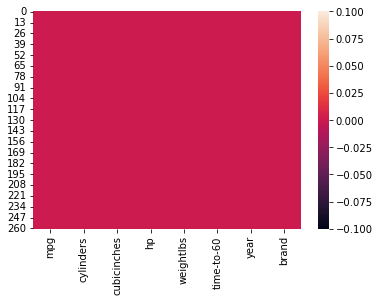

In [9]:
plt.figure()
sns.heatmap(cars.isna())
plt.show()

# I.2.3 - Analyse de fond
    - Visualisation de la target : brand : Pays d'origine du vehicule (3 types de données)
        <> " US."      : 62%
        <> " Europe."  : 20%
        <> " Japan."   : 18%
    - Signification des features et interpretation graphique
        -> Significations :
            <> Variables Qualitatives
                * cubicinches : Volume du cylindres (75 types données)
                * weightlbs : Poids du vehicule (240 types de données)
            <> Variables Quantitatives
                * mpg : Economi de carburant du vehicule
                * cylinders : Nombre de cylindre du vehicule
                * hp : Hauy parleur du vehicule
                * time-to-60 : La vitesse du vehicule par heure
                * year : Annee de sortie du vehicule
        -> Interpretation graphique :
            <> Variables Qualitatives
                * La majorité des vehicules semble provenir des " US."
            <> Variables Quantitatives
                * La plus part de courbes ne suivent pas une loi normale : donc les varibles 
                  ne sont pas standardisés
                * L'economie en carburant est certainement bien lie a son origine(pays ou brand)
    - Relations features / target
        -> Variables Qualitatives
            * La majorité des vehicules semble provenir des " US."
        -> Variables Quantitatives
            # I.2.3 - Analyse détaillée
    - Visualisation de la target : brand : Pays d'origine du vehicule (3 types de données)
        <> " US." : 62%
        <> " Europe." : 20%
        <> " Japan." : 18%
    - Signification des features et interpretation graphique
        -> Significations :
            <> Variables Qualitatives
                * cubicinches : Volume du cylindres (75 types données)
                * weightlbs : Poids du vehicule (240 types de données)
            <> Variables Quantitatives
                * mpg : Economi de carburant du vehicule
                * cylinders : Nombre de cylindre du vehicule
                * hp : Hauy parleur du vehicule
                * time-to-60 : La vitesse du vehicule par heure
                * year : Annee de sortie du vehicule
        -> Interpretation graphique :
            <> Variables Qualitatives
                * Une mutitude de données de type object
            <> Variables Quantitatives
                * La plus part de courbes ne suivent pas une loi normale : donc les varibles 
                  ne sont pas standardisés
    - Relations features / target
        -> Variables Qualitatives
            <> La majorité des vehicules semble provenir des " US."
            <> Le poids des vehicule essaye de nous renseigne sur leurs origines
        -> Variables Quantitatives
            <> L'economie en carburant est certainement bien lie a son origine(pays ou brand)
            <> Le cylindres, la vitesse nous donnes beaucoup d'information sur les vehicules

In [10]:
# - Visualisation de la variable target
cars['brand'].value_counts(normalize = True)

 US.        0.620690
 Japan.     0.195402
 Europe.    0.183908
Name: brand, dtype: float64

<AxesSubplot:ylabel='brand'>

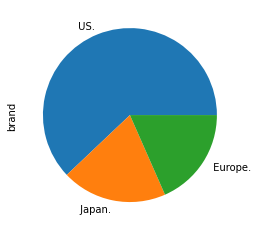

In [11]:
cars['brand'].value_counts(normalize = True).plot.pie()

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

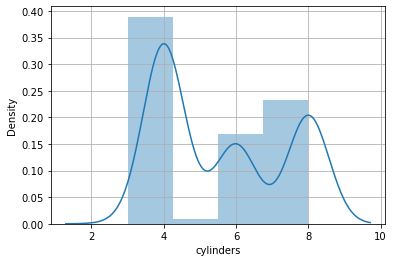

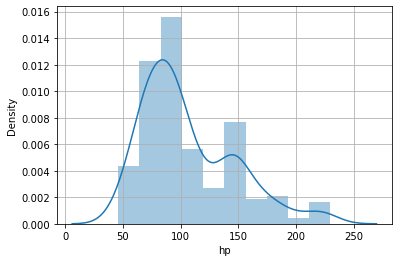

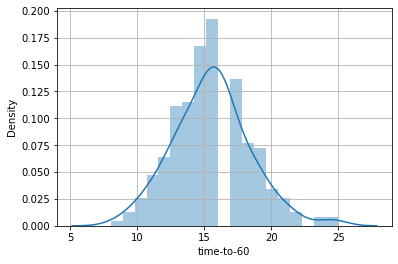

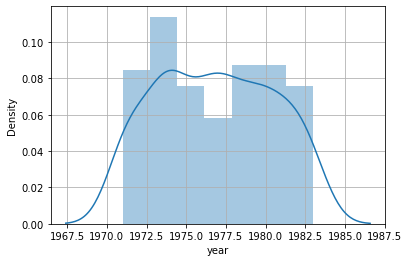

In [12]:
# Variables continues
for var in cars.select_dtypes('int'):
    plt.figure()
    sns.distplot(cars[var])
    plt.grid()
plt.show()

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


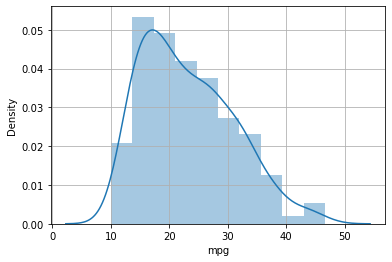

In [13]:
plt.figure()
sns.distplot(cars["mpg"])
plt.grid()
plt.show()

In [14]:
#variables qualitatives
for var in cars.select_dtypes('object'):
    print(f"{var} : {len(cars[var].unique())}")

cubicinches : 75
weightlbs : 240
brand : 3


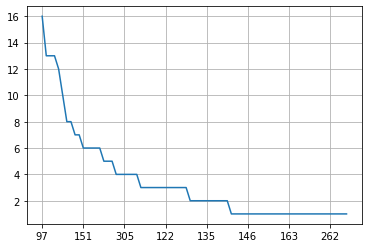

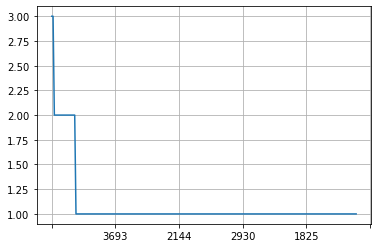

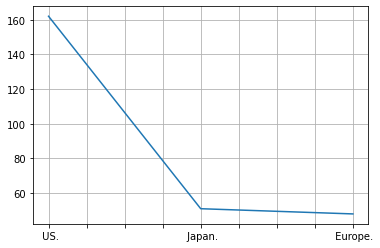

In [15]:
for var in cars.select_dtypes('object'):
    plt.figure()
    cars[var].value_counts().plot()
    plt.grid()
plt.show()

In [16]:
# - Relation
# - Creation des sous enseble de la variables target etant données qu'on a trois groupe
US_cars = cars[cars["brand"] == " US."]
Europe_cars = cars[cars["brand"] == " Europe."]
Japan_cars = cars[cars["brand"] == " Japan."]

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

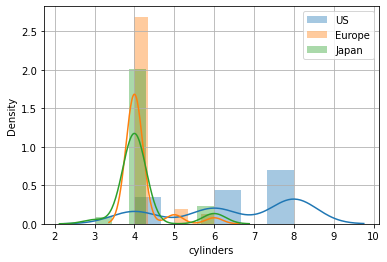

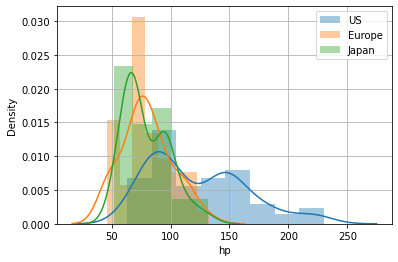

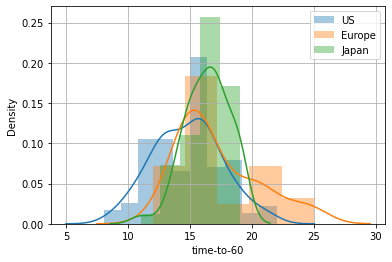

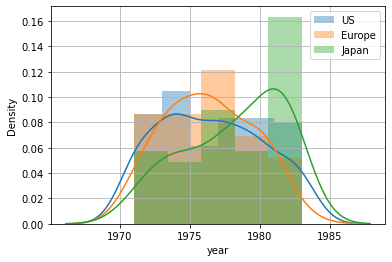

In [17]:
# - Realation avec les variable int
for var in cars.select_dtypes('int'):
    plt.figure()
    sns.distplot(US_cars[var], label = "US")
    sns.distplot(Europe_cars[var], label = "Europe")
    sns.distplot(Japan_cars[var], label = "Japan")
    plt.grid()
    plt.legend()
plt.show()

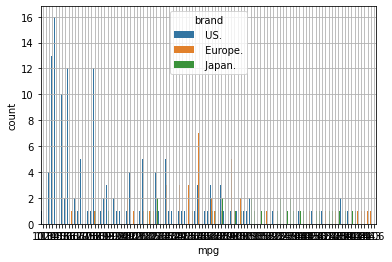

In [18]:
# - Realation avec la variable float
plt.figure()
sns.countplot(x = "mpg", hue = "brand", data = cars)
plt.grid()
plt.show()

In [19]:
# - Relation avec les variable qualitative
pd.crosstab(cars["brand"], cars["cubicinches"])

cubicinches     101  105  107  108  110  112  113  114  115  ...  83  85  86  \
brand                                                        ...               
 Europe.     0    1    0    2    0    1    0    0    1    1  ...   0   0   0   
 Japan.      0    0    0    1    4    0    0    2    0    0  ...   1   4   3   
 US.         2    0    3    0    0    0    3    0    0    0  ...   0   0   1   

cubicinches  88  89  90  91  96  97  98  
brand                                    
 Europe.      1   1   5   1   1   9   3  
 Japan.       0   2   0   4   0   7   2  
 US.          0   0   1   1   0   0   8  

[3 rows x 75 columns]

In [20]:
pd.crosstab(cars["brand"], cars["weightlbs"])

weightlbs     1613  1649  1755  1760  1773  1795  1800  1825  1834  ...  4615  \
brand                                                               ...         
 Europe.   1     0     0     0     0     0     0     0     1     1  ...     0   
 Japan.    0     1     1     1     1     1     2     1     0     0  ...     0   
 US.       2     0     0     0     0     0     0     1     0     0  ...     1   

weightlbs  4638  4654  4657  4668  4735  4906  4951  4952  4997  
brand                                                            
 Europe.      0     0     0     0     0     0     0     0     0  
 Japan.       0     0     0     0     0     0     0     0     0  
 US.          1     1     1     1     1     1     1     1     1  

[3 rows x 240 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


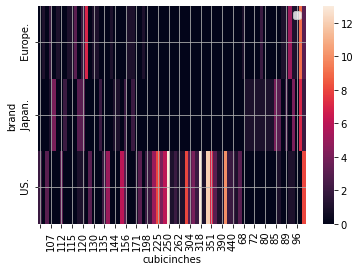

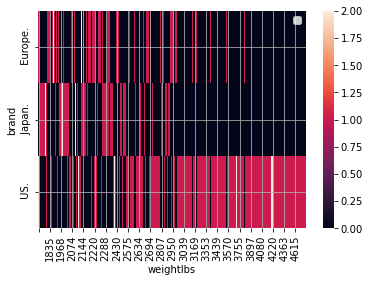

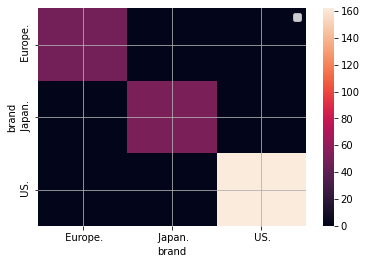

In [21]:
for var in cars.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(cars["brand"], cars[var]), annot = False, fmt = "d")
    plt.grid()
    plt.legend()
plt.show()

# I.2.d - Conclusion
    - Le dataset n'a presque aucun données manquante
    - Les données qui sembles interessant : "cylinders", "time-to-60" et "mpg" 
    - Des variables qui joue un role non negligeables : "weightlbs"

# I.3 - Analyse détaillée

# I.3.a - Relation variables / variables
    - Certaine variables semble etre tres correlé comme :
        <> le haut parleur et le cylindre 
        <> la vitesse et l'année de sorti
    - On observe aussi une tendance de regression entre les droites de regression des vehicule 
      de l'Europe et du japon (Economie en carburant)

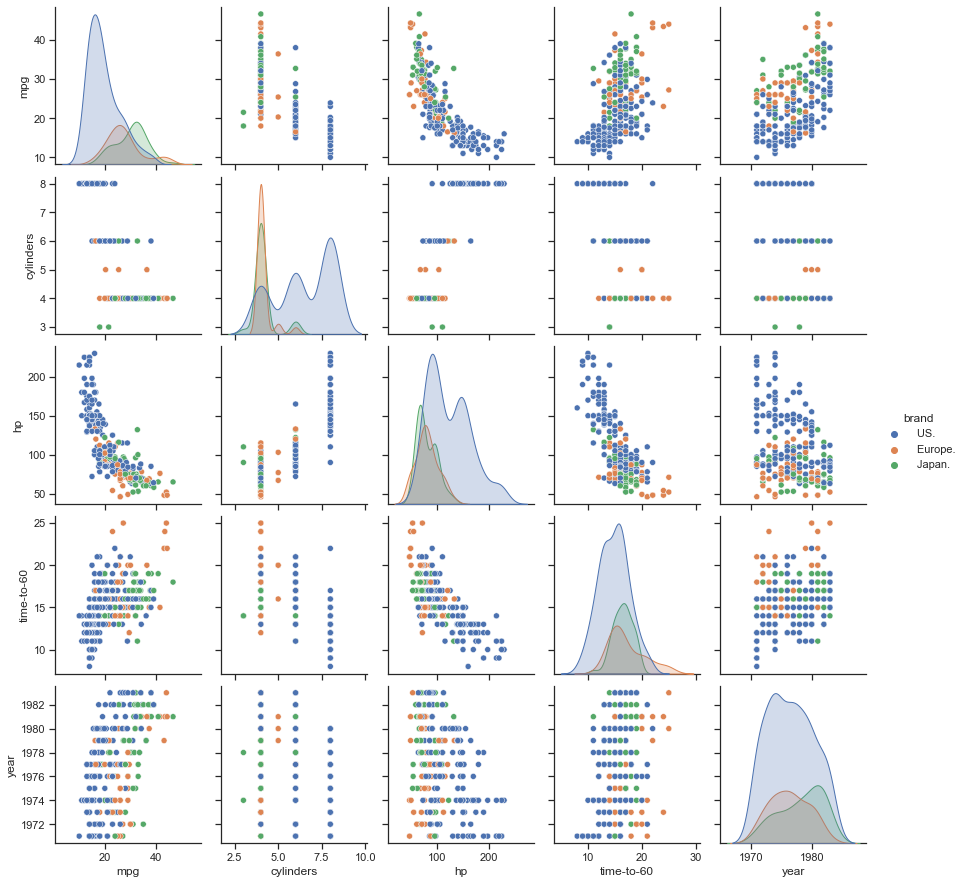

In [22]:
# - Varaibles continu
sns.set(style="ticks", color_codes=True)
sns.pairplot(cars, hue="brand")

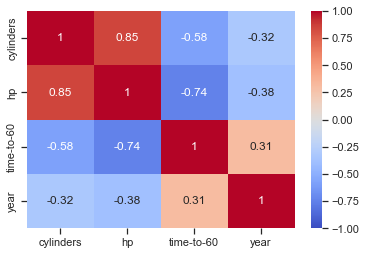

In [23]:
plt.figure()
sns.heatmap(cars.select_dtypes('int').corr(), vmin = -1, vmax = +1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 432x288 with 0 Axes>

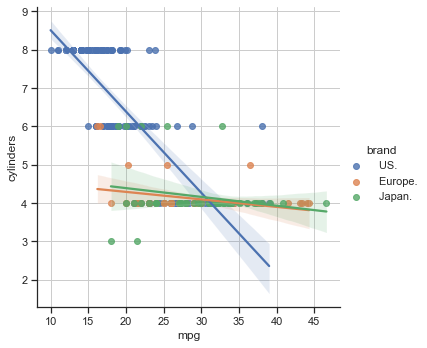

<Figure size 432x288 with 0 Axes>

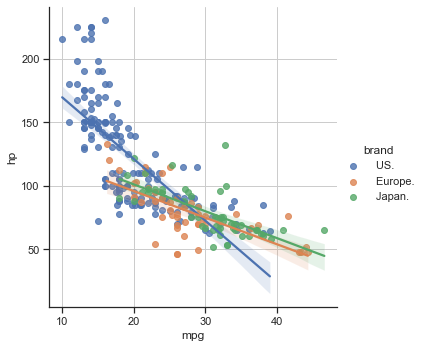

<Figure size 432x288 with 0 Axes>

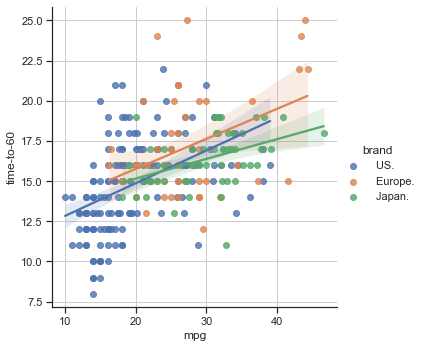

<Figure size 432x288 with 0 Axes>

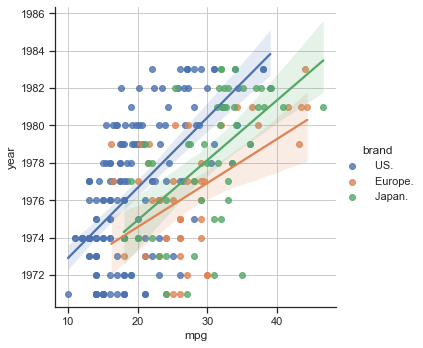

In [24]:
# - Relation entre les variable int et float

for var in cars.select_dtypes('int'):
    plt.figure()
    sns.lmplot(x = "mpg", y = var, hue = "brand", data = cars)
    plt.grid()
plt.show()

# I.3.b - Hypotheses nulle
    - Le voiture provenant de l'Europ ont un nombre de cylindre eleve
        -> H0 : le nombre moyen de cylindre est egal chez vouture provenant des US, de l'Europe 
           et du Japon
           Ce qui est interessant de constater sur ce test est que : le nombre de cylindre 
           semble etre une varaible significativement differentes pour les voutures provenant 
           de "US", "Europe" et "Japon"
            * Resultat Khi2 : Donc le l'hypothese zero est rejetée

    - Le voiture provenant du japon semble avoir une bonne vitesse
        -> H0 : le nombre moyen de vitesse est egal chez vouture provenant des US, de l'Europe 
           et du Japon
           De meme la vitesse semble etre une varaible significativement differentes pour les 
           voutures provenant 
           de "US", "Europe" et "Japon"
            * Resultat Khi2 : Donc le l'hypothese zero est rejetée

# I.3.c - tests de studens ou de Khi2
    - Le principe est simple :
        Elle va etre d'essayer de regetter cette hypothes et pour ca, on va definir un seuil de 
        probabilité alpha qui en generale est aux allentour de 2% ou 5%, puis on calcule une 
        valeur p avec notre test de studens ou notre teste de khi2 est si la valeur est inferieur
        a notre seuil de probabilite alpha, alors on peut regete cette hypothese sinon on ne peut
        pas regeter cette hypothese.
    - Les ensemble doivent avoir presque le meme nombre d'element

In [25]:
from scipy.stats import ttest_ind # test d'independance
US_cars_Khi2 = US_cars.sample(40)
Europe_cars_Khi2 = Europe_cars.sample(40)
Japan_cars_Khi2 = Japan_cars.sample(40)

In [26]:
def test_khi2(var):
    alpha =0.05
    stat, p = ttest_ind(US_cars_Khi2[var].dropna(), Europe_cars_Khi2[var].dropna())
    if p < alpha:
        return "H0 Réjetéé"
    else:
        stat, p = ttest_ind(US_cars_Khi2[var].dropna(), Japan_cars_Khi2[var].dropna())
        if p < alpha:
            return "H0 Réjetéé"
        else:
            stat, p = ttest_ind(Europe_cars_Khi2[var].dropna(), Japan_cars_Khi2[var].dropna())
            if p < alpha:
                return "H0 Réjetéé"
            else:
                return 0

In [27]:
for var in cars.select_dtypes("int").columns:
    print(f"{var :-<30} {test_khi2(var)}")

cylinders--------------------- H0 Réjetéé
hp---------------------------- H0 Réjetéé
time-to-60-------------------- H0 Réjetéé
year-------------------------- H0 Réjetéé


# II - Présentation du programme et des résultats
    II.1 - Pre-processing
        II.1.a - TrainTest
        II.1.b - Encodage et imputation (nettoyage du dataset)
    II.2 - Modelisations
        II.2.a - Tests des differents models
        II.2.b - Choix du model
        II.2.c - Optimisation du model (optimisation de la precision ou du recall)
    II.3 - Test du model

In [29]:
cars_1 = cars.copy()
cars_1 = cars_1.drop(['mpg', 'cubicinches', 'hp', 'weightlbs', 'year'], axis=1)
cars_1.head()

cylinders  time-to-60     brand
0          8          12       US.
1          4          14   Europe.
2          8          11       US.
3          8          10       US.
4          4          17       US.

# II.1 - Pre-processing

# II.1.a - TrainTest

In [30]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(cars_1, test_size = 0.1, random_state = 0)

In [31]:
trainset["brand"].value_counts()

 US.        148
 Japan.      44
 Europe.     42
Name: brand, dtype: int64

In [32]:
testset["brand"].value_counts()

 US.        14
 Japan.      7
 Europe.     6
Name: brand, dtype: int64

# II.1.b - Encodage et imputation (nettoyage du dataset)

In [33]:
# Etant donné que les sous ensembles des voitures venant de l'Europe et du Japon est tres
#insignifiant, on va les joindre
def encodage(df):
    def conv(x):
        if x != " ":
            return float(x)
    code = {
        " US." : 0,
        " Europe." : 1,
        " Japan." : 2
    }
    for var in df.select_dtypes("object"):
        if var == "brand":
            df.loc[:, var] = df[var].map(code)
        else:
            df.loc[:, var] = df[var].map(conv)
    return df

In [34]:
def imputation(df):
    df = df.fillna(-999)
    #df.dropna(axis = 0)
    return df

In [35]:
def prepocessing(df):
    df = imputation(encodage(df))
    X = df.drop("brand", axis = 1)
    Y = df["brand"]
    print(Y.value_counts())
    return X, Y

In [36]:
x_train, y_train = prepocessing(trainset)
x_test, y_test = prepocessing(testset)

0    148
2     44
1     42
Name: brand, dtype: int64
0    14
2     7
1     6
Name: brand, dtype: int64


# II.2 - Modelisations

In [37]:
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

In [38]:
def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return X, Y

In [39]:
def plot_contours(ax, clf, X, Y, **params):
    Grid = clf.predict(np.c_[X.ravel(), Y.ravel()])
    Grid = Grid.reshape(X.shape)
    plotting = ax.contourf(X, Y, Grid, **params)
    return plotting

In [40]:
C = 1.0 
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

In [41]:
models = (clf.fit(x_train, y_train) for clf in models)
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# II.2.a - Tests des differents models

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


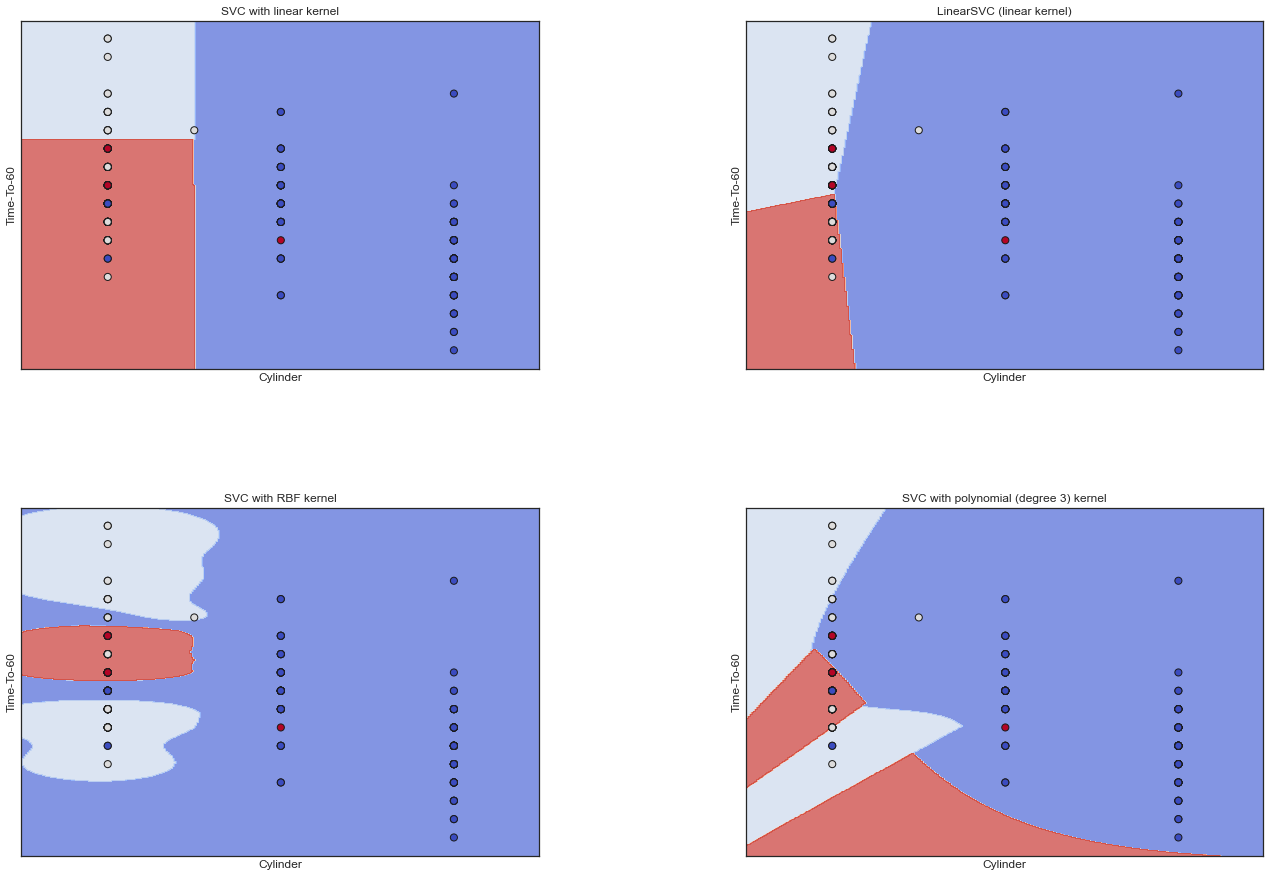

In [42]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=3, top=3, wspace=0.4, hspace=0.4)

c, t = x_train.iloc[:, 0], x_train.iloc[:, 1]
C, T = make_meshgrid(c, t)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, C, T, cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(c, t, c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
    ax.set_xlabel("Cylinder")
    ax.set_ylabel("Time-To-60")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

# II.2.b - Choix du model 

In [43]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [44]:
c = np.logspace(start = -15, stop = 15, base = 1.02)
param_grid = {
    "C" : np.linspace(0.1, 1.0, 50),
    "gamma" : np.linspace(0.1, 1, 10)
}
model = SVC(random_state = 0)

grid = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)
print("Meilleurs parametres sont %s avec un score de %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print("Meilleur estimation accuracy est {:.2f} ".format(grid.best_estimator_.score(x_test, y_test) * 100 ) )

Meilleurs parametres sont {'C': 0.6326530612244898, 'gamma': 0.8} avec un score de 70
Meilleur estimation accuracy est 70.37 


# II.2.c - Optimisation du model (optimisation de la precision ou du recall)

In [45]:
model = SVC(C = 0.6326530612244898, gamma = 0.8, random_state = 0, kernel = "rbf")
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('Sensibilité du SVC sur la formation: {:.2f}'.format(model.score(x_train, y_train)))
print('Sensibilité du SVC sur le test: {:.2f}'.format(model.score(x_test, y_test)))

Sensibilité du SVC sur la formation: 0.74
Sensibilité du SVC sur le test: 0.70


In [46]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[12  1  1]
 [ 3  3  0]
 [ 0  3  4]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.43      0.50      0.46         6
           2       0.80      0.57      0.67         7

    accuracy                           0.70        27
   macro avg       0.68      0.64      0.65        27
weighted avg       0.72      0.70      0.70        27



# II.3 - Test du model

In [52]:
def modelValidationTest(model, mpg, cylinders, cubicinches, hp, weightlbs, time_to_60, year):
    labels = [" US.", " Europe.", " Japan."]
    print(f"<> Economie en carburant : {mpg}")
    print(f"<> Nombre de cylindre : {cylinders}")
    print(f"<> Volume des cylindre : {cubicinches}")
    print(f"<> Haut parleur : {hp}")
    print(f"<> Poids du vehicule : {weightlbs}")
    print(f"<> Vitesse par heure : {time_to_60}")
    print(f"<> Années de sorti : {year}")
    print(f"<> Pays d'origine : {labels[model.predict([[cylinders, time_to_60]])[0]]}")

In [53]:
modelValidationTest(model = model, mpg = 17.0, cylinders = 2, cubicinches = 305, hp = 130, 
                    weightlbs = 3840, time_to_60 = 20, year = 1980)

<> Economie en carburant : 17.0
<> Nombre de cylindre : 2
<> Volume des cylindre : 305
<> Haut parleur : 130
<> Poids du vehicule : 3840
<> Vitesse par heure : 20
<> Années de sorti : 1980
<> Pays d'origine :  US.


C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
